In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class discriminator(nn.Module):
  def __init__(self,in_channels):
    super(discriminator,self).__init__()

    self.disc=nn.Sequential(
        nn.Linear(in_channels,128),
        nn.LeakyReLU(0.1),
        nn.Linear(128,1),
        nn.Sigmoid()
    )

  def forward(self,x):
      return self.disc(x)

In [3]:
class generator(nn.Module):
  def __init__(self,z_dim,img_dim):
    super().__init__()

    self.gen=nn.Sequential(
        nn.Linear(z_dim,256),
        nn.LeakyReLU(0.1),
        nn.Linear(256,img_dim),
        nn.Tanh()
    )
  def forward(self,x):
    return self.gen(x)


In [4]:
#Hyperparameters
device="cuda" if torch.cuda.is_available() else "cpu"
lr=3e-4
z_dim=64
img_dim=28*28*1
batch_size=32
n_epochs=40

disc=discriminator(img_dim).to(device)
gen=generator(z_dim,img_dim).to(device)
fixed_noise=torch.randn((batch_size,z_dim)).to(device)
transf=transforms.Compose(
    [transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))]
)

In [5]:
#Data sets
dataset=datasets.MNIST(root="\dataset",transform=transf,download=True)
loader=DataLoader(dataset,batch_size=batch_size,shuffle=True)
opt_disc=optim.Adam(disc.parameters(),lr=lr)
opt_gen=optim.Adam(gen.parameters(),lr=lr)
criteria=nn.BCELoss()
step=0


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 6069983.00it/s]


Extracting \dataset/MNIST/raw/train-images-idx3-ubyte.gz to \dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 160358.61it/s]


Extracting \dataset/MNIST/raw/train-labels-idx1-ubyte.gz to \dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:05<00:00, 324942.89it/s]


Extracting \dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to \dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3434384.13it/s]

Extracting \dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to \dataset/MNIST/raw



In [6]:
#Training

for epoch in range(n_epochs):
  if epoch%10==0:
    print(epoch)
  for id, (real,_) in enumerate(loader):
    real=real.view(-1,784).to(device)
    batch_size=real.shape[0]
    #Discriminater
    noise=torch.randn((batch_size,z_dim)).to(device)
    fake=gen(noise)
    disc_real=disc(real).view(-1)
    lossD_real=criteria(disc_real,torch.ones_like(disc_real))
    disc_fake=disc(fake).view(-1)
    lossD_fake=criteria(disc_fake,torch.zeros_like(disc_fake))
    lossD=0.5*(lossD_fake+lossD_real)
    disc.zero_grad()
    lossD.backward(retain_graph=True)
    opt_disc.step()

    #Geneartor
    output=disc(fake).view(-1)
    lossG=criteria(output,torch.ones_like(output))
    gen.zero_grad()
    lossG.backward()
    opt_gen.step()





0
10
20
30


(10, 28, 28)


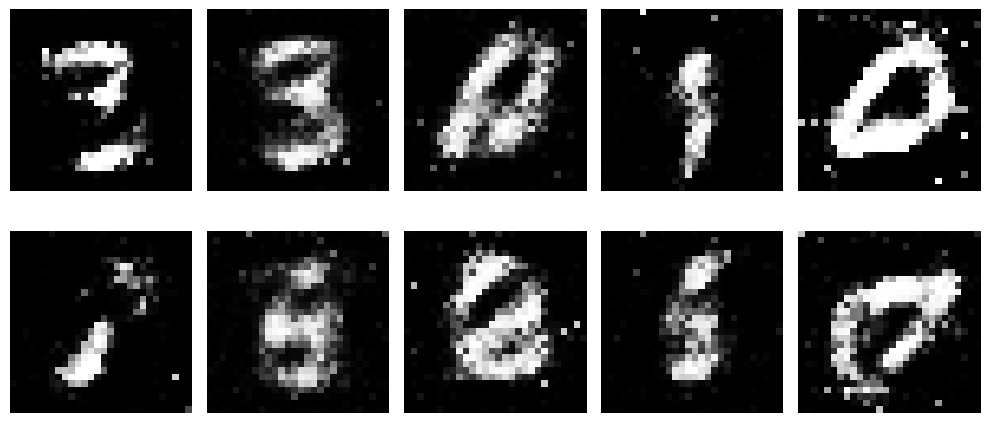

In [7]:
#Generating Images
size=64
random=torch.randn(100,size,device=device)
with torch.no_grad():
 fake=gen(random)
 disc_fake=disc(fake)

image_np=fake[:10].detach().cpu().numpy()
image_np=image_np.reshape(10,28,-1)
print(image_np.shape)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(image_np[i], cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

